<a href="https://colab.research.google.com/github/Vivek-anand-jain/CS235FinalAssignment/blob/master/CS235_Assignment_with_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [0]:
data_table = pd.read_csv('/content/drive/My Drive/CS235/train.csv')

In [0]:
label = data_table['label']
data = data_table.drop("label", axis = 1)
# data = data / 255
X_train, X_validation, y_train, y_validation = train_test_split(data, label, test_size=0.2, random_state=7)

pca_reduced.shape =  (42000, 2)


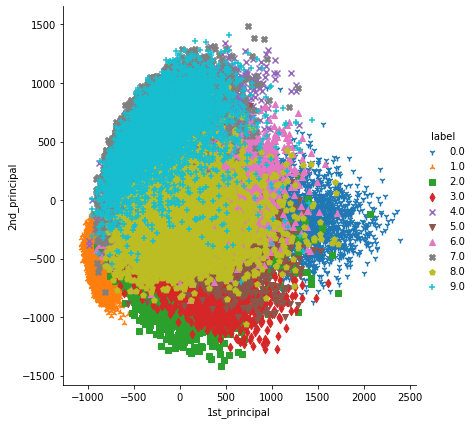

In [5]:
# initializing the pca
pca = decomposition.PCA()
pca.n_components = 2 # the number of components = 2
pca_data = pca.fit_transform(data)

print("pca_reduced.shape = ", pca_data.shape)

pca_data = np.vstack((pca_data.T, label)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
s.FacetGrid(pca_df, hue="label", height=6, hue_kws={"marker": ["1", "2", "s", "d", "x", "v", "^", "X", "p", "+"]}).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [0]:
from sklearn.svm import SVC
SVM = SVC(gamma=0.1, kernel='poly').fit(X_train , y_train)

In [7]:
print('Accuracy / Cross Validation: ', SVM.score(X_validation, y_validation))

Accuracy / Cross Validation:  0.9742857142857143


In [11]:
print('Accuracy / Cross Validation: ', SVM.score(X_train, y_train))

Accuracy / Cross Validation:  1.0


In [0]:
test_data = pd.read_csv('/content/drive/My Drive/CS235/test.csv')

In [0]:
ans = SVM.predict(test_data.values)
index = range(1, len(test_data) + 1)
df = pd.DataFrame({'ImageId': index, 'Label': ans})
df.to_csv('final_submit.csv', index=False)